# Symbolic Regressor
---

`gplearn.genetic.SymbolicRegressor` is a powerful tool for symbolic regression in Python, provided by the `gplearn` library. It leverages genetic programming to automatically discover the mathematical expression that best describes a given dataset. Unlike traditional regression methods, it simultaneously searches for both the optimal function form and its parameters, rather than assuming a predefined model structure.

The primary purpose of `SymbolicRegressor` is to uncover underlying analytical relationships or physical laws in data, especially when little or no prior knowledge about the data structure is available. It is particularly valuable when interpretability and an explicit, human-readable equation are more important than purely predictive performance.


In [1]:
from gplearn.genetic import SymbolicRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

## 1. Create synthetic dataset

In this section, we generate a synthetic dataset with three features (`X0`, `X1`, `X2`) and one target variable `y`. The target variable is defined using a non-linear symbolic relationship:

$$
y = 3 \cdot X_1^2 - 2 \cdot X_2 + \sin(X_3) + \text{noise}
$$

where Gaussian noise is added to simulate measurement or environmental variations. This setup allows the symbolic regression model to learn complex non-linear relationships. We also store the data in a Pandas DataFrame for easy inspection and manipulation.


In [2]:
np.random.seed(42)
n_samples = 200
X = np.random.uniform(-5, 5, size=(n_samples, 3))

# Non-linear symbolic relationship: y = 3*X1^2 - 2*X2 + sin(X3) + noise
y = 3 * X[:, 0]**2 - 2 * X[:, 1] + np.sin(X[:, 2]) + np.random.normal(0, 0.5, size=n_samples)

# DataFrame for visualization
df = pd.DataFrame(X, columns=['X0', 'X1', 'X2'])
df['y'] = y


## 2. Define and train the model

Here, we instantiate a `SymbolicRegressor` from the `gplearn` library. Key parameters include:

* `population_size`: Number of candidate solutions in each generation.
* `generations`: Number of iterations for evolving solutions.
* `tournament_size`: Number of individuals competing for reproduction.
* `function_set`: Mathematical functions allowed in the symbolic expressions (e.g., `add`, `sub`, `mul`, `div`, `sin`, `cos`, `sqrt`).
* `stopping_criteria`: Threshold to stop training early if a satisfactory solution is found.
* `parsimony_coefficient`: Penalizes overly complex equations to encourage simpler solutions.

The model is trained on the dataset, evolving candidate expressions to approximate the target variable `y`.

In [3]:
est_gp = SymbolicRegressor(
    population_size=1000,
    generations=20,
    tournament_size=20,
    stopping_criteria=0.01,
    function_set=('add', 'sub', 'mul', 'div', 'sin', 'cos', 'sqrt'),
    const_range=(-5, 5),
    parsimony_coefficient=0.01,
    max_samples=0.9,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

est_gp.fit(X, y)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    14.11          49.6277       22          14.5348           15.266     39.15s
   1    13.32          26.2176        9          8.95105          10.8405     13.01s
   2    14.85          28.9158       11          5.25966          5.72439     10.93s
   3    16.10          31.7819       11          2.73374          3.29941      9.93s
   4    14.12          26.7922       15         0.912376         0.717338      8.47s
   5    15.27          32.5789       13         0.751785         0.771647      8.18s
   6    14.50          36.3978       13         0.744637          0.83598      7.81s
   7    13.73          37.5161       11         0.740233         0.875618      7.42s
   8    13.04           37.054       11         0.723432          1.02683  

SymbolicRegressor(const_range=(-5, 5),
                  function_set=('add', 'sub', 'mul', 'div', 'sin', 'cos',
                                'sqrt'),
                  max_samples=0.9, n_jobs=-1, parsimony_coefficient=0.01,
                  random_state=42, stopping_criteria=0.01, verbose=1)

## 3. Predict and evaluate

Once the model is trained, we use it to predict the target values. To evaluate its performance, we calculate:

* **Mean Squared Error (MSE)**: Measures the average squared difference between actual and predicted values. Lower values indicate better fit.
* **R² Score**: Represents the proportion of variance in the target variable explained by the model. A value closer to 1 indicates high predictive accuracy.

We also print the symbolic equation discovered by the model, which provides a human-readable mathematical expression representing the learned relationship.


In [4]:
y_pred = est_gp.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Equation found by SymbolicRegressor:")
print(est_gp._program)
print(f"\nMSE: {mse:.4f}")
print(f"R^2: {r2:.4f}")

Equation found by SymbolicRegressor:
sub(sub(mul(add(add(X0, X0), X0), X0), X1), X1)

MSE: 0.8125
R^2: 0.9984


## 4. Plot results

Finally, we visualize the model's performance using a scatter plot:

* **X-axis**: Actual target values.
* **Y-axis**: Predicted values from the symbolic regressor.
* A reference line (`y = x`) is plotted to show ideal predictions. Points close to this line indicate accurate predictions.

This visualization helps in quickly assessing how well the symbolic regressor approximates the underlying function.

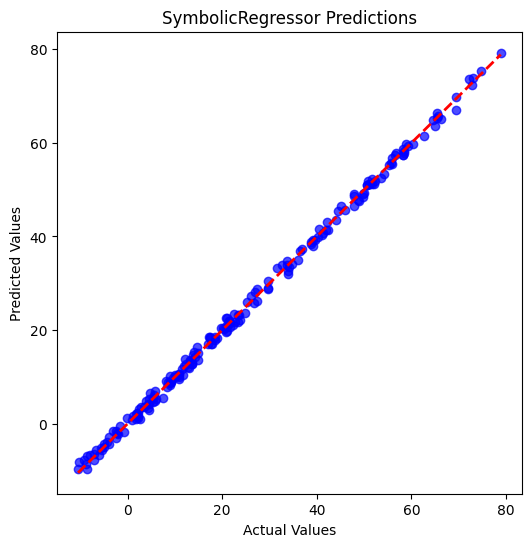

In [5]:
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SymbolicRegressor Predictions")
plt.show()